___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
<center>*Copyright Pierian Data 2017*</center>
<center>*For more information, visit us at www.pieriandata.com*</center>

# Stock Market Analysis Project

### Please Note: You are free to treat this as a full exercise, or just view the solutions video as a code along project. This project is meant to be pretty challenging as it will introduce a few new concepts through some hints!

Welcome to your first capstone project! This project is meant to cap off the first half of the course, which mainly dealt with learning the libraries that we use in this course, the second half of the course will deal a lot more with quantitative trading techniques and platforms.

We'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017. Keep in mind that this project is mainly just to practice your skills with matplotlib, pandas, and numpy. Don't infer financial trading advice from the analysis we do here!

### Part 0: Import

** Import the various libraries you will need-you can always just come back up here or import as you go along :) **

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline 

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)

**  *Note! Not everyone will be working on a computer that will give them open access to download the stock information using pandas_datareader (firewalls, admin permissions, etc...). Because of this, the csv file for the Tesla is provided in a data folder inside this folder. It is called Tesla_Stock.csv. Feel free to just use this with read_csv! **

** Use pandas_datareader to obtain the historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2017.**



In [2]:
import pandas_datareader
import datetime 
import pandas_datareader.data as web

In [3]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [4]:
Tesla = web.DataReader("TSLA", "yahoo", start, end)

In [5]:
Tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,28.940001,29.500000,27.650000,28.080000,28.080000,928100
2012-01-04,28.209999,28.670000,27.500000,27.709999,27.709999,630100
2012-01-05,27.760000,27.930000,26.850000,27.120001,27.120001,1005500
2012-01-06,27.200001,27.790001,26.410000,26.910000,26.910000,986300
2012-01-09,27.000000,27.490000,26.120001,27.250000,27.250000,897000


### Other Car Companies

** Repeat the same steps to grab data for Ford and GM (General Motors), **

In [6]:
Ford = web.DataReader("F", 'yahoo', start, end)


In [7]:
Ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,8.879592,45709900
2012-01-04,11.15,11.53,11.07,11.30,9.015218,79725200
2012-01-05,11.33,11.63,11.24,11.59,9.246586,67877500
2012-01-06,11.74,11.80,11.52,11.71,9.342322,59840700
2012-01-09,11.83,11.95,11.70,11.80,9.414124,53981500


In [8]:
GM = web.DataReader("GM", 'yahoo', start, end)

In [9]:
GM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,20.830000,21.180000,20.750000,21.049999,18.024912,9321300
2012-01-04,21.049999,21.370001,20.750000,21.150000,18.110542,7856700
2012-01-05,21.100000,22.290001,20.959999,22.170000,18.983959,17880600
2012-01-06,22.260000,23.030001,22.240000,22.920000,19.626179,18234500
2012-01-09,23.200001,23.430000,22.700001,22.840000,19.557673,12084500


## Part 2: Visualizing the Data

** Time to visualize the data. **

** Follow along and recreate the plots below according to the instructions and explanations. **

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

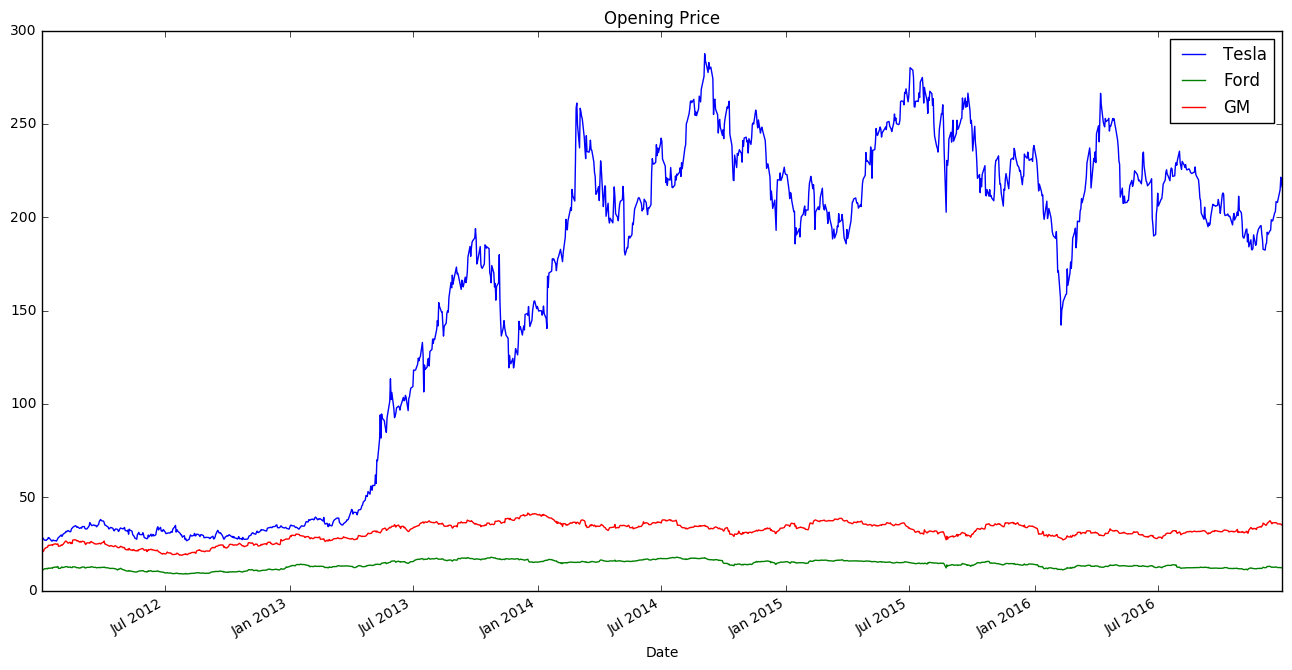

In [10]:
Tesla["Open"].plot(label='Tesla', figsize=(16,8), title="Opening Price")
Ford['Open'].plot(label = 'Ford')
GM['Open'].plot(label='GM')
plt.legend();

____

** Plot the Volume of stock traded each day.**

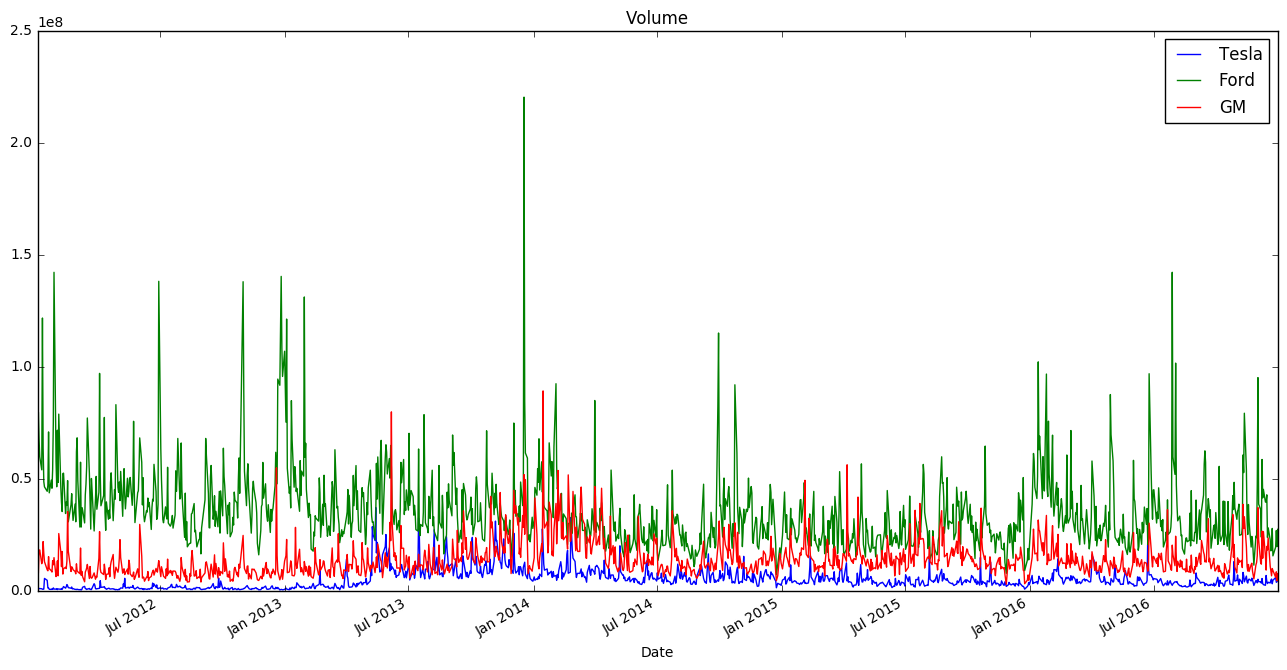

In [11]:
Tesla['Volume'].plot(label='Tesla', figsize=(16,8), title ="Volume")
Ford['Volume'].plot(label='Ford')
GM['Volume'].plot(label='GM')
plt.legend();

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**

**Bonus: What happened that day? **

In [12]:
Ford['Volume'].argmax()

Timestamp('2013-12-18 00:00:00')

____

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [13]:
# Code Here 

** Plot this "Total Traded" against the time index.**

In [14]:
Tesla['Total Traded'] = Tesla['Open']*Tesla['Volume']
Ford['Total Traded'] = Ford['Open']*Ford['Volume']
GM['Total Traded'] = GM['Open']*GM['Volume']

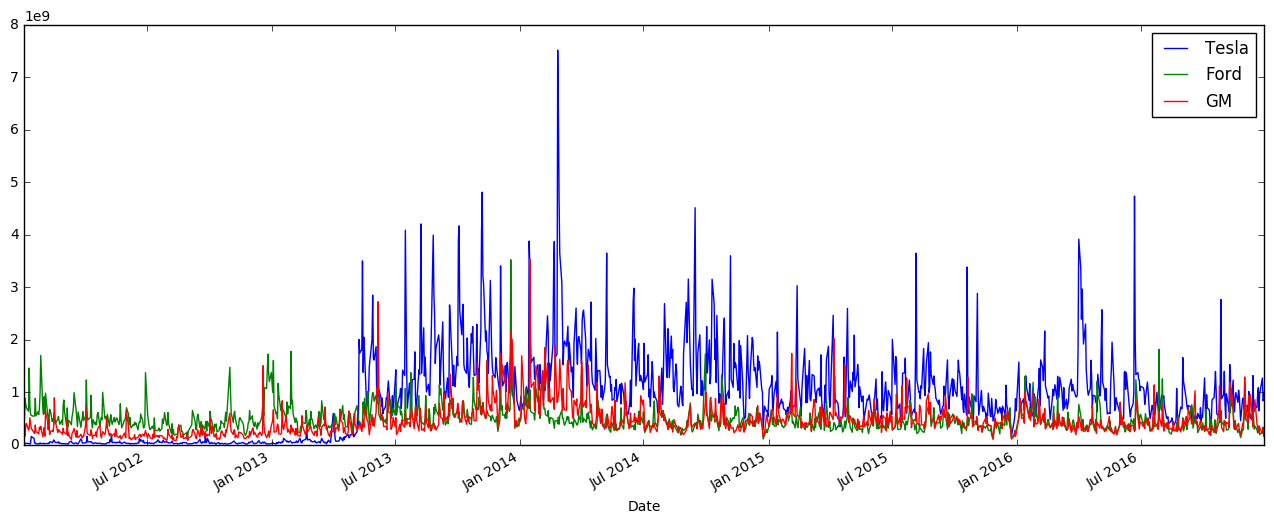

In [15]:
Tesla['Total Traded'].plot(label = 'Tesla', figsize=(16,6))
Ford["Total Traded"].plot(label = 'Ford')
GM['Total Traded'].plot(label='GM')
plt.legend();

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [16]:
Tesla["Total Traded"].argmax()

Timestamp('2014-02-25 00:00:00')

____

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

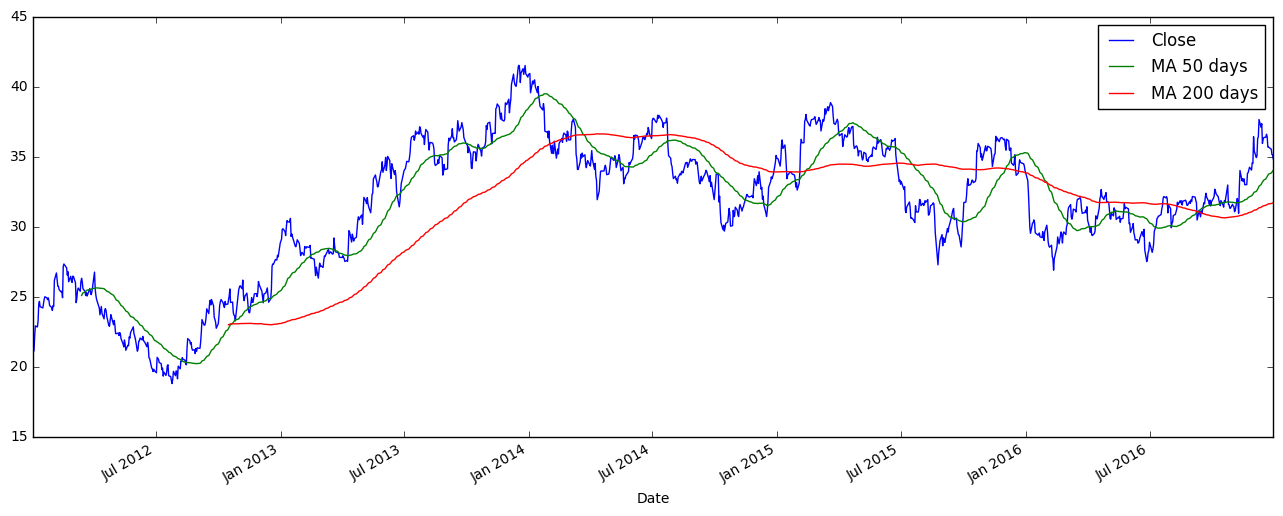

In [17]:
GM['Close MA50'] = GM['Close'].rolling(50).mean()
GM['Close MA200'] = GM['Close'].rolling(200).mean()
GM['Close'].plot(label='Close', figsize=(16,6))
GM['Close MA50'].plot(label='MA 50 days')
GM['Close MA200'].plot(label='MA 200 days')
plt.legend();

______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [18]:
from pandas import scatter_matrix

In [19]:
car_comp = pd.concat([Tesla['Open'], GM['Open'], Ford['Open']], axis=1)

In [20]:
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']
car_comp.head()

,Tesla Open,GM Open,Ford Open
Date,,,
2012-01-03,28.940001,20.830000,11.00
2012-01-04,28.209999,21.049999,11.15
2012-01-05,27.760000,21.100000,11.33
2012-01-06,27.200001,22.260000,11.74
2012-01-09,27.000000,23.200001,11.83


C:\Users\Jai Katariya\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


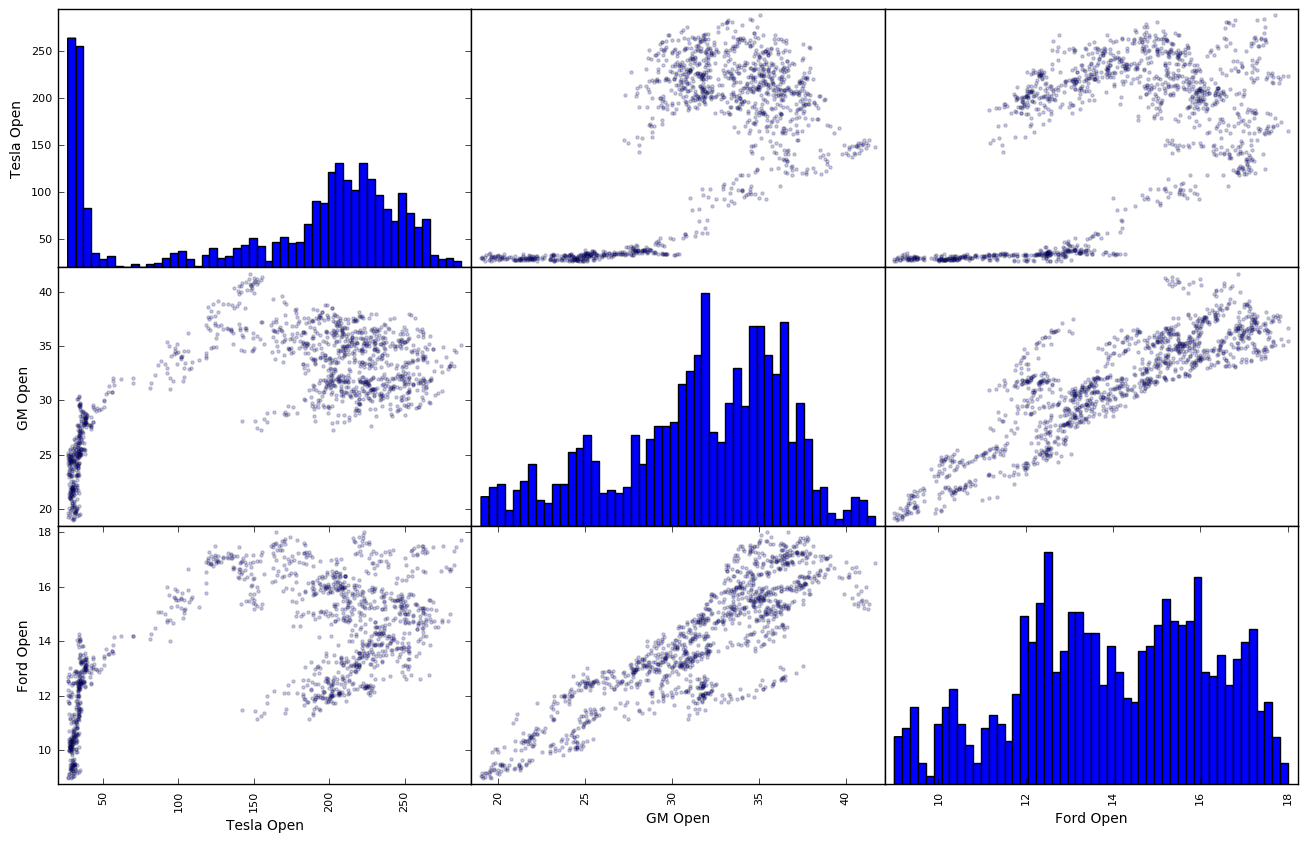

In [21]:
scatter_matrix(car_comp, figsize=(16,10), alpha= 0.2, hist_kwds={'bins':50})
plt.legend();

_____
### Bonus Visualization Task! (Note: This is hard!)
**Let's now create a candlestick chart! Watch the video if you get stuck on trying to recreate this visualization, there are quite a few steps involved!Refer to the video to understand how to interpret and read this chart. Hints: https://matplotlib.org/examples/pylab_examples/finance_demo.html**

** Create a CandleStick chart for Ford in January 2012 (too many dates won't look good for a candlestick chart)**

In [22]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

In [23]:
ford_reset = Ford.loc['2012-01'].reset_index()

In [24]:
ford_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
Date            20 non-null datetime64[ns]
Open            20 non-null float64
High            20 non-null float64
Low             20 non-null float64
Close           20 non-null float64
Adj Close       20 non-null float64
Volume          20 non-null int64
Total Traded    20 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 1.3 KB


In [25]:
ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))

In [26]:
ford_reset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Total Traded,date_ax
0,2012-01-03,11.00,11.25,10.99,11.13,8.879592,45709900,502808900.0,734505.0
1,2012-01-04,11.15,11.53,11.07,11.30,9.015218,79725200,888935980.0,734506.0
2,2012-01-05,11.33,11.63,11.24,11.59,9.246586,67877500,769052075.0,734507.0
3,2012-01-06,11.74,11.80,11.52,11.71,9.342322,59840700,702529818.0,734508.0
4,2012-01-09,11.83,11.95,11.70,11.80,9.414124,53981500,638601145.0,734511.0


____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [29]:
Tesla['Returns'] = (Tesla["Close"]/Tesla["Close"].shift(1))-1

In [30]:
Tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Total Traded,Returns
Date,,,,,,,,
2012-01-03,28.940001,29.500000,27.650000,28.080000,28.080000,928100,2.685921e+07,NaN
2012-01-04,28.209999,28.670000,27.500000,27.709999,27.709999,630100,1.777512e+07,-0.013177
2012-01-05,27.760000,27.930000,26.850000,27.120001,27.120001,1005500,2.791268e+07,-0.021292
2012-01-06,27.200001,27.790001,26.410000,26.910000,26.910000,986300,2.682736e+07,-0.007743
2012-01-09,27.000000,27.490000,26.120001,27.250000,27.250000,897000,2.421900e+07,0.012635


In [ ]:
# Pandas Percentage change 

In [31]:
Tesla["Returns"] = Tesla['Close'].pct_change(1)

In [33]:
GM['Returns']= GM['Close'].pct_change(1)

In [34]:
Ford['Returns'] = Ford['Close'].pct_change(1)

** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

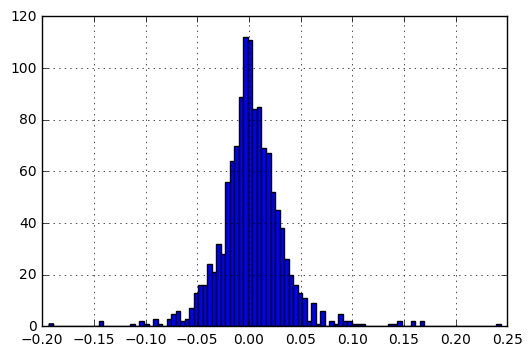

In [39]:
Tesla['Returns'].hist(bins=100);

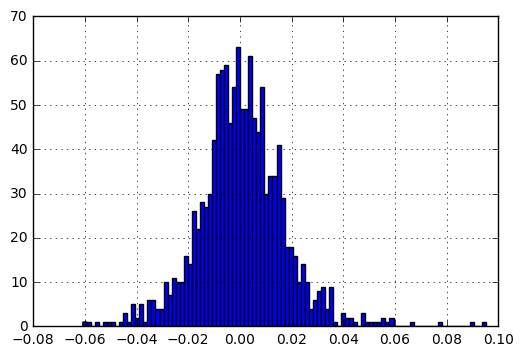

In [41]:
GM['Returns'].hist(bins=100);

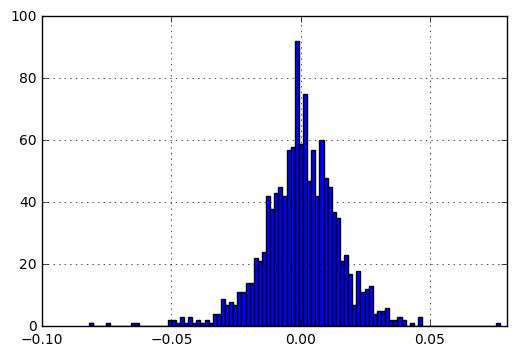

In [43]:
Ford['Returns'].hist(bins=100);

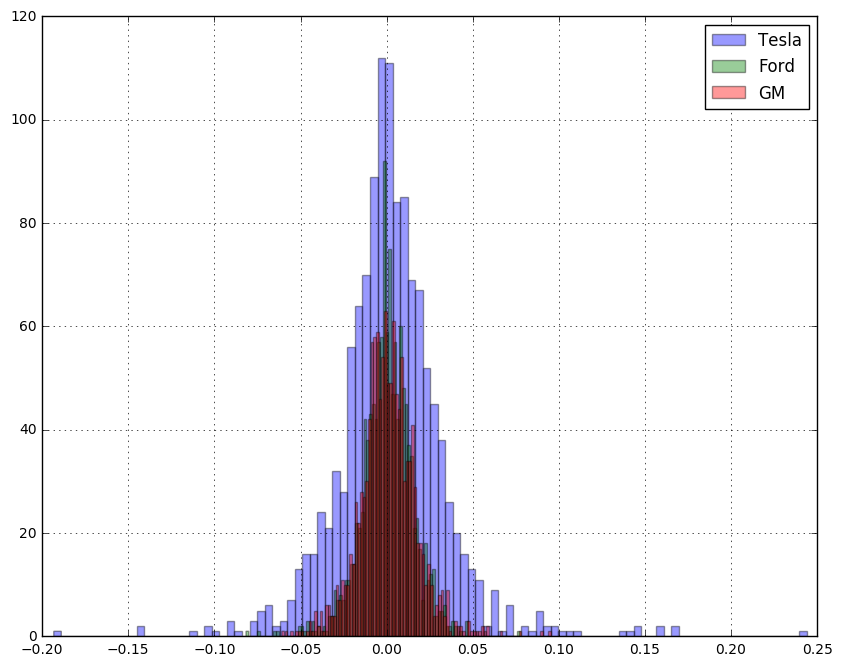

In [65]:
Tesla['Returns'].hist(bins=100, label = 'Tesla', figsize=(10,8), alpha = 0.4)
Ford['Returns'].hist(bins=100, label='Ford' ,figsize=(10,8), alpha = 0.4)
GM['Returns'].hist(bins=100, label = 'GM', figsize=(10,8), alpha =0.4)
plt.legend();


** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

AttributeError: Unknown property bw

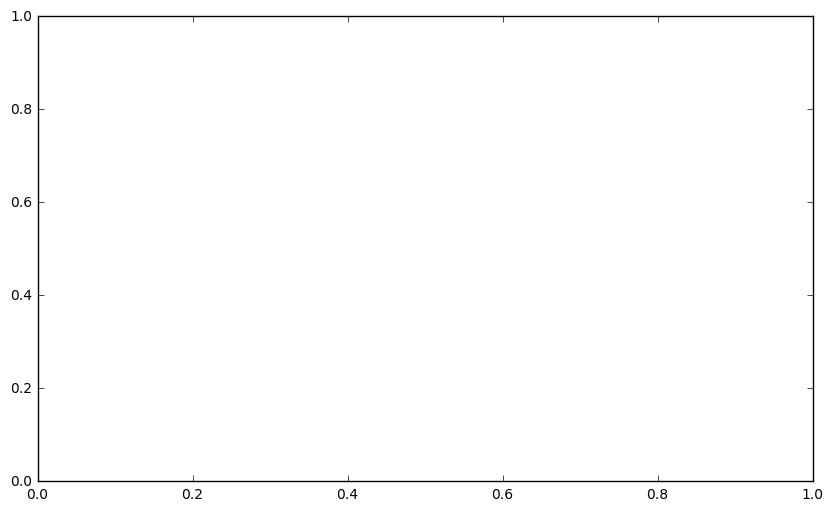

In [70]:
Tesla['Returns'].plot(kind='kde', label = 'Tesla', figsize=(10,6))
GM['Returns'].plot(kind='kde', label = 'GM', figsize=(10,6))

** Try also creating some box plots comparing the returns. **

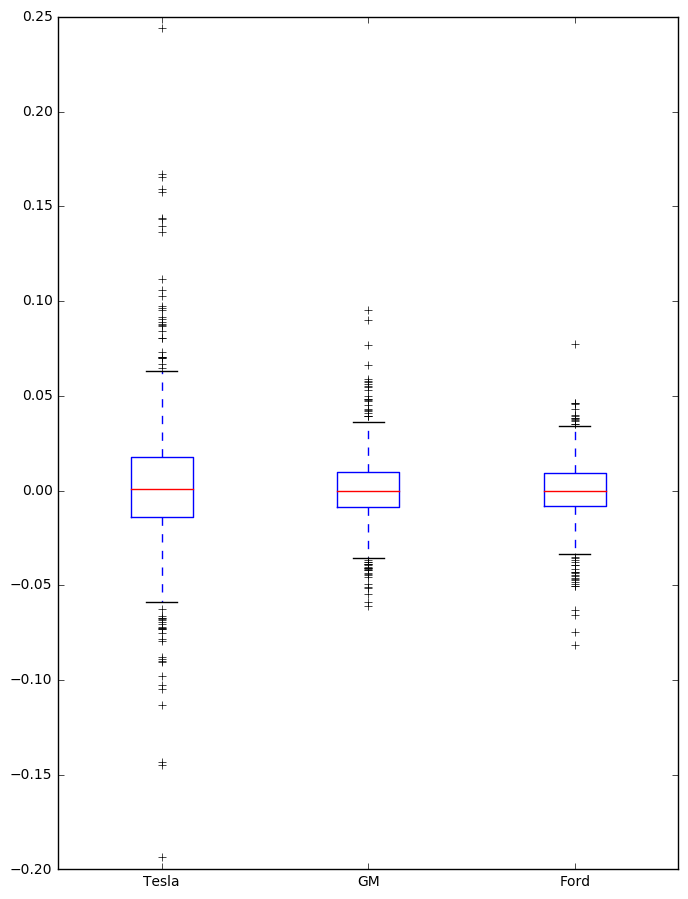

In [76]:
box_df = pd.concat([Tesla['Returns'], GM['Returns'], Ford['Returns']], axis=1)
box_df.columns = ['Tesla', 'GM', 'Ford']
box_df.plot(kind='box', figsize=(8,11))

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

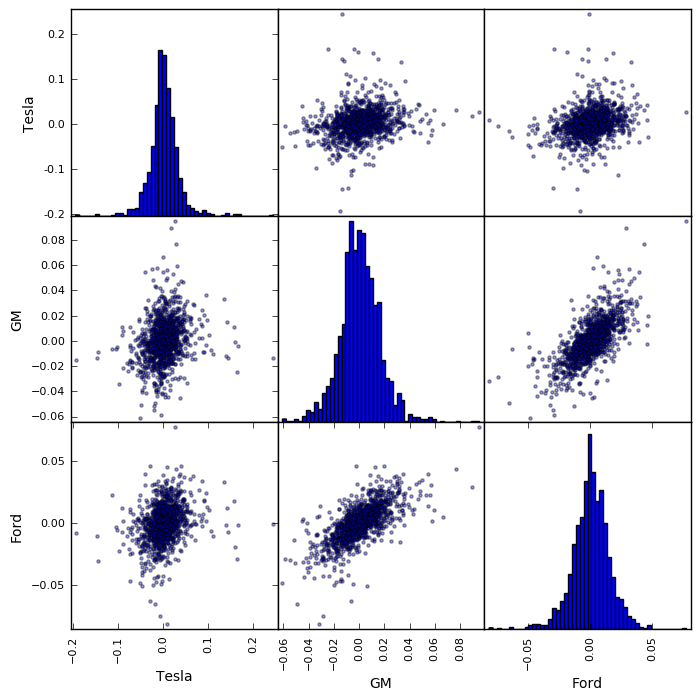

In [89]:
scatter_matrix(box_df, figsize=(8,8), alpha=0.4, hist_kwds={'bins':50});

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

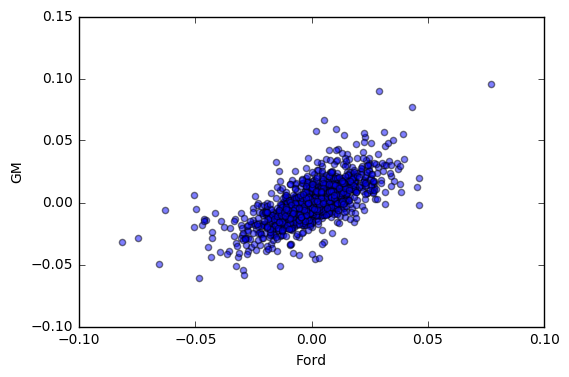

In [95]:
box_df.plot(kind='scatter',x='Ford', y='GM', alpha=0.5);

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [97]:
Tesla['Cumulative Returns'] = (1+Tesla['Returns']).cumprod()

In [99]:
GM['Cumulative Returns'] = (1+GM['Returns']).cumprod()

In [100]:
Ford['Cumulative Returns'] = (1+Ford['Returns']).cumprod()

** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

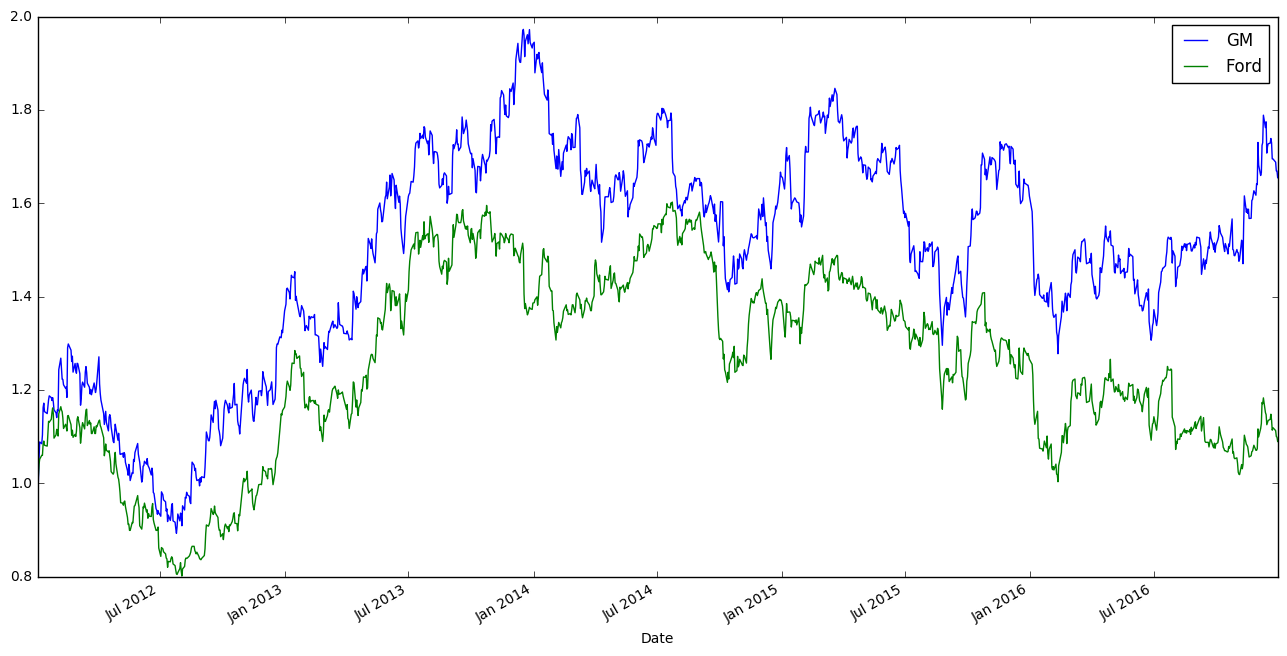

In [103]:
#Tesla['Cumulative Returns'].plot(label='Tesla', figsize=(16,8))
GM['Cumulative Returns'].plot(label='GM', figsize=(16,8))
Ford['Cumulative Returns'].plot(label='Ford', figsize=(16,8))
plt.legend();

# Great Job!

That is it for thsi very basic analysis, this concludes this half of the course, which focuses much more on learning the tools of the trade. The second half of the course is where we really dive into functionality designed for time series, quantitative analysis, algorithmic trading, and much more!